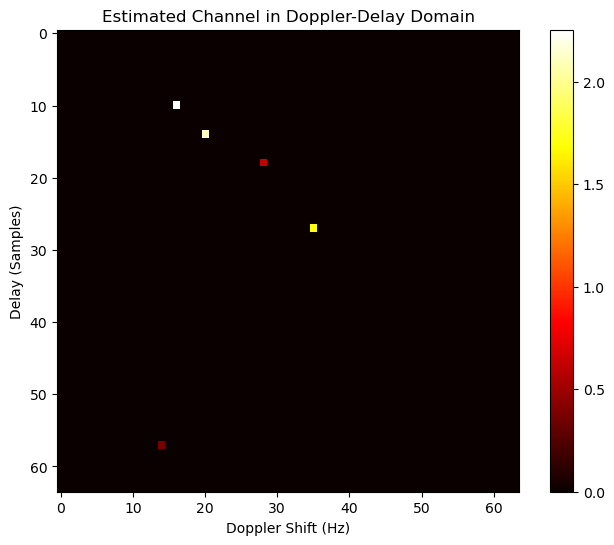

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 64  # Number of subcarriers (time dimension)
M = 64  # Number of subcarriers (frequency dimension)
L = 5   # Number of multipaths
SNR_dB = 20  # Signal-to-noise ratio (dB)
num_symbols = N * M  # Number of symbols in the OTFS grid

# Generate random channel with delay and Doppler shifts
def generate_channel(N, M, L):
    # Random delays (in samples) and Doppler shifts (in Hz)
    delays = np.random.randint(0, N, L)
    dopplers = np.random.randint(-M//2, M//2, L)
    
    # Channel matrix with random coefficients for each path
    H = np.zeros((N, M), dtype=complex)
    
    for l in range(L):
        # Generate random complex coefficients for each path
        h_l = np.random.randn() + 1j * np.random.randn()
        H[delays[l], dopplers[l]] = h_l
    
    return H, delays, dopplers

# Simulate OTFS channel transmission
def otfs_channel_simulation(H, SNR_dB):
    # Generate random symbols (QPSK modulation)
    symbols = np.random.randint(0, 4, num_symbols)
    symbols_qpsk = np.exp(1j * np.pi * symbols / 2)  # QPSK modulation
    
    # Reshape symbols into the OTFS grid
    symbols_grid = symbols_qpsk.reshape((N, M))
    
    # Add channel effects (delay and Doppler)
    received_signal = np.dot(H, symbols_grid)  # Linear convolution
    
    # Add noise
    noise_power = 10 ** (-SNR_dB / 10)
    noise = np.sqrt(noise_power / 2) * (np.random.randn(N, M) + 1j * np.random.randn(N, M))
    
    received_signal += noise
    return received_signal

# Estimate the channel using a simple pilot-based method
def estimate_channel(received_signal, N, M, L, delays, dopplers):
    # For simplicity, assume pilots are located at known positions in the grid
    estimated_H = np.zeros((N, M), dtype=complex)
    
    # Iterate through each multipath component
    for l in range(L):
        estimated_H[delays[l], dopplers[l]] = received_signal[delays[l], dopplers[l]]
    
    return estimated_H

# Visualization of the estimated channel
def plot_channel(estimated_H, N, M):
    plt.figure(figsize=(8, 6))
    plt.imshow(np.abs(estimated_H), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title("Estimated Channel in Doppler-Delay Domain")
    plt.xlabel("Doppler Shift (Hz)")
    plt.ylabel("Delay (Samples)")
    plt.show()

# Main script
H, delays, dopplers = generate_channel(N, M, L)
received_signal = otfs_channel_simulation(H, SNR_dB)

# Estimate the channel
estimated_H = estimate_channel(received_signal, N, M, L, delays, dopplers)

# Plot the true and estimated channel
plot_channel(estimated_H, N, M)
